In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load training dataset and split it into X and y vector
train = np.loadtxt('group15_train.txt')
X, y = train[:, 0], train[:, 1]
val = np.loadtxt('group15_val.txt')
X_val, y_val = val[:, 0], val[:, 1]
test = np.loadtxt('group15_test.txt')
X_test, y_test = test[:, 0], test[:, 1]

Text(0, 0.5, 'y')

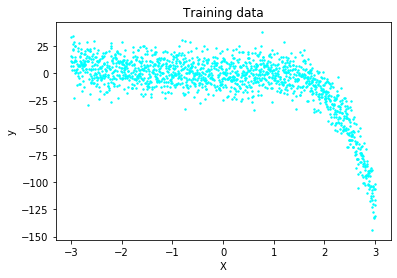

In [3]:
# simply visualising data
plt.scatter(X, y, color = 'cyan', s = 2)
plt.title('Training data')
plt.xlabel('X')
plt.ylabel('y')

In [4]:
# Set hyperparameter p
p = 4

In [5]:
# Generate Design Matrix Z
Z = np.ones((X.shape[0], p+1))
Z_val = np.ones((X_val.shape[0], p+1))
Z_test = np.ones((X_test.shape[0], p+1))
for i in range(1, p+1):
    Z[:, i] = np.power(X, i)
    Z_val[:, i] = np.power(X_val, i)
    Z_test[:, i] = np.power(X_test, i)

In [6]:
# Learn parameters
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), y)

In [7]:
# make predictions
y_prediction = np.dot(W, Z.T)
y_val_prediction = np.dot(W, Z_val.T)
y_test_prediction = np.dot(W, Z_test.T)

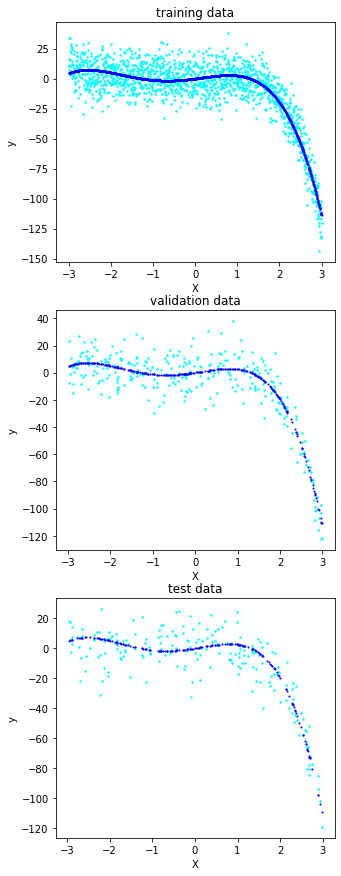

In [8]:
# visualise training data and polynomial fit
plt.rcParams['figure.figsize'] = [5, 15]
fig, axs = plt.subplots(3, 1)
axs[0].set_title('training data')
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].scatter(X, y, s = 2, color = 'cyan')
axs[0].scatter(X, y_prediction, color = 'blue', s = 1)
axs[1].set_title('validation data')
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].scatter(X_val, y_val, s = 2, color = 'cyan')
axs[1].scatter(X_val, y_val_prediction, color = 'blue', s = 1)
axs[2].set_title('test data')
axs[2].set_xlabel('X')
axs[2].set_ylabel('y')
axs[2].scatter(X_test, y_test, s = 2, color = 'cyan')
axs[2].scatter(X_test, y_test_prediction, color = 'blue', s = 1)

In [9]:
# Performance check
trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-y)))
vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-y_val)))
testlossRMS = np.sqrt(np.mean(np.square(y_test_prediction-y_test)))
{'train loss': trainlossRMS, 'validation loss': vallossRMS, 'test loss': testlossRMS}

{'train loss': 11.173753454342693,
 'validation loss': 11.02741854146357,
 'test loss': 11.668500241012845}

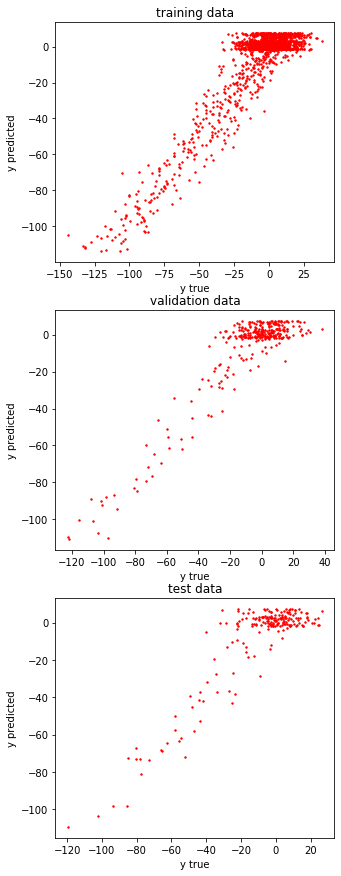

In [10]:
# Scatter plot
plt.rcParams['figure.figsize'] = [5, 15]
fig, axs = plt.subplots(3, 1)
axs[0].set_title('training data')
axs[0].set_xlabel('y true')
axs[0].set_ylabel('y predicted')
axs[0].scatter(y, y_prediction, s = 2, color = 'red')
axs[1].set_title('validation data')
axs[1].set_xlabel('y true')
axs[1].set_ylabel('y predicted')
axs[1].scatter(y_val, y_val_prediction, s = 2, color = 'red')
axs[2].set_title('test data')
axs[2].set_xlabel('y true')
axs[2].set_ylabel('y predicted')
axs[2].scatter(y_test, y_test_prediction, s = 2, color = 'red')

{'train loss': 27.592334286771393, 'validation loss': 28.178895666017453}
{'train loss': 21.345552765902863, 'validation loss': 22.103479490056444}
{'train loss': 16.551474491617334, 'validation loss': 16.846017086513864}
{'train loss': 12.321679255094356, 'validation loss': 12.324777612189466}
{'train loss': 11.173753454342693, 'validation loss': 11.02741854146357}
{'train loss': 10.944689571343266, 'validation loss': 11.165429270620308}
{'train loss': 10.932929593945365, 'validation loss': 11.190312130847902}
{'train loss': 10.932796392634758, 'validation loss': 11.19061165769605}
{'train loss': 10.931338357963066, 'validation loss': 11.182064302160706}
{'train loss': 10.92716858137769, 'validation loss': 11.193902587827091}
{'train loss': 10.925700013999139, 'validation loss': 11.189671149640953}
{'train loss': 10.925034272956442, 'validation loss': 11.192454950317922}
{'train loss': 10.924316337990719, 'validation loss': 11.206336139487714}
{'train loss': 10.923881733688035, 'valid

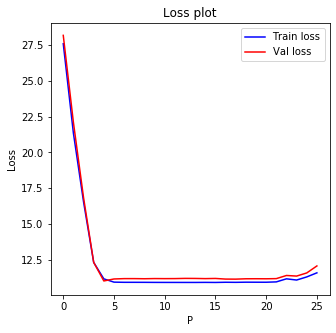

In [11]:
# Linear Search for best hyperparameter
p_min = 0
p_max = 25
verbose = True

Z = np.ones((X.shape[0], 1))
Z_val = np.ones((X_val.shape[0], 1))

TrainLoss = []
ValLoss = []
for p in range(p_min, p_max+1):
    # Append column X^p to Design Matrix Z
    if p > 0:
        z = np.power(X, p)
        z = np.reshape(z, (z.shape[0], 1))
        z_val = np.power(X_val, p)
        z_val = np.reshape(z_val, (z_val.shape[0], 1))
        Z = np.hstack((Z, z))
        Z_val = np.hstack((Z_val, z_val))
    # Learn parameters
    W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), y)
    # make predictions
    y_prediction = np.dot(W, Z.T)
    y_val_prediction = np.dot(W, Z_val.T)
    # Performance check
    trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-y)))
    vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-y_val)))
    if verbose:
        print({'train loss': trainlossRMS, 'validation loss': vallossRMS})
    TrainLoss.append(trainlossRMS)
    ValLoss.append(vallossRMS)
# visualise training error and validation error
plt.rcParams['figure.figsize'] = [5, 5]
trainplt = plt.plot(range(p_min, p_max+1), TrainLoss, color = 'blue', label = 'Train loss')
valplt = plt.plot(range(p_min, p_max+1), ValLoss, color = 'red', label = 'Val loss')
plt.title('Loss plot')
plt.xlabel('P')
plt.ylabel('Loss')
plt.legend()